# ComtechModel Baseline
---


## Download Data


### Authorization In Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

### Unzipping Files

In [0]:
import zipfile
from google.colab import drive

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Dataset_Comtech/left_small_train.zip", 'r')
zip_ref.extractall("/tmp/Dataset")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Dataset_Comtech/left_small_val.zip", 'r')
zip_ref.extractall("/tmp/Dataset")
zip_ref.close()

### Path To Files

In [0]:
import os

path_train = '/tmp/Dataset/left_train/'
path_val = '/tmp/Dataset/left_train/'

train_first_dir = os.path.join('/tmp/Dataset/left_train/1')
train_second_dir = os.path.join('/tmp/Dataset/left_train/2')
train_third_dir = os.path.join('/tmp/Dataset/left_train/3')

validation_first_dir = os.path.join(path_val + '1')
validation_second_dir = os.path.join(path_val + '2')
validation_third_dir = os.path.join(path_val + '3')

### Total Number Images In Directories

In [0]:
print('total training first images:', len(os.listdir(train_first_dir)))
print('total training second images:', len(os.listdir(train_second_dir)))
print('total training third images:', len(os.listdir(train_third_dir)))

total training first images: 404
total training second images: 317
total training third images: 298


In [0]:
train_first_names = os.listdir(train_first_dir)
print(train_first_names[:10])

train_second_names = os.listdir(train_second_dir)
print(train_second_names[:10])

train_third_names = os.listdir(train_third_dir)
print(train_third_names[:10])

['source1_166.bmp', 'source3_259.bmp', 'source1_282.bmp', 'source3_251.bmp', 'source3_240.bmp', 'source1_158.bmp', 'source1_164.bmp', 'source3_110.bmp', 'source1_297.bmp', 'source1_151.bmp']
['2_original_blur-4source1_021.bmp_dd3f1e59-3a31-4c32-987a-5d5d2562f4d0.bmp', '2_original_source1_027.bmp_bbd3fda8-07cc-40cf-8c0f-ca22bc83f5c0.bmp', '2_original_blur-4source3_001.bmp_fe3fd67d-18ca-40e2-8baf-9d43b7acd30d.bmp', '2_original_blur-6source3_020.bmp_42471dab-1cb5-4bf7-9a41-82b9e067caf4.bmp', '2_original_source3_202.bmp_1de277ed-ca66-4435-83c7-7fc8e64163be.bmp', 'blur-4source3_212.bmp', 'blur-6source3_211.bmp', 'source3_208.bmp', 'blur-6source1_027.bmp', 'source3_209.bmp']
['blur-4source3_198.bmp', '3_original_source3_029.bmp_ba1c8a95-a3ea-4ef4-acac-64bdfa244918.bmp', 'blur-4source3_199.bmp', '3_original_blur-6source1_042.bmp_bb2dc423-9866-4cd6-8a85-faa2d5cb1b36.bmp', '3_original_source3_197.bmp_f7d67ef6-5432-4561-a30f-25fd2af67eb0.bmp', '3_original_source1_033.bmp_8719f5f3-4a9e-4319-a8f7-

## Build Model

In [0]:
import tensorflow as tf

number_classes = 3
input_shape = (245, 310, 3)

model = tf.keras.models.Sequential([
    # 5 Conv Layers With MaxPolling 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    # Flatten Layer In One Array
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(number_classes, activation='softmax')
])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 243, 308, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 241, 306, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 153, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 118, 151, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 116, 149, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 74, 64)        0         
_________________________________________

### Compile Model

In [0]:
from tensorflow.keras.optimizers import RMSprop

# When using the sparse_categorical_crossentropy loss, your targets should be integer targets. 
# If you have categorical targets, you should use categorical_crossentropy.
model.compile(optimizer = RMSprop(lr=0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Data Generation

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

target_size = (245, 310)
rotation = 20

# Normalization Data 
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=rotation, zca_whitening=True)

train_generator = train_datagen.flow_from_directory(
        '/tmp/Dataset/left_train/',  # This is the source directory for training images
        target_size=target_size,  # All images will be resized to 245, 310
        batch_size=64,
        class_mode="sparse")

# Validation Generator 
validation_datagen = ImageDataGenerator(rescale=1/255, rotation_range=rotation)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/Dataset/left_val/',
    target_size=target_size,
    batch_size=16,
    class_mode="sparse")

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 1017 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


### Training

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=16,  
      epochs=2,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/2


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:7

Epoch 1/2
15/15 - 12s - loss: 1.1463 - acc: 0.3521 - val_loss: 1.0779 - val_acc: 0.3421
Epoch 2/2
Epoch 1/2
15/15 - 9s - loss: 1.0308 - acc: 0.4567 - val_loss: 0.9861 - val_acc: 0.4298


## Visualisation Layers


In [0]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/tmp/Dataset/left_train/1/source1_001.bmp'

img = image.load_img(img_path, target_size=target_size)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 245, 310, 3)


### One Image Visualisation

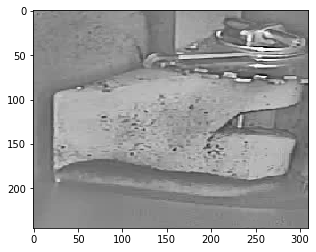

array([[0.48757675, 0.26151058, 0.25091273]], dtype=float32)

In [0]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [0]:
[0.48757675, 0.26151058, 0.25091273]

In [0]:
print(len(model.layers))
print('Outpit Layers', model.layers[0].output)
model.layers

9
Outpit Layers Tensor("conv2d_76/Relu:0", shape=(?, 243, 308, 32), dtype=float32)


In [0]:
from tensorflow.keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
print('Activation Model', activation_model)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

# Here we can activated First Layers in NN
first_layer_activation = activations[0]
print(first_layer_activation.shape)

Activation Model <tensorflow.python.keras.engine.training.Model object at 0x7fb6efcdc128>
(1, 243, 308, 32)


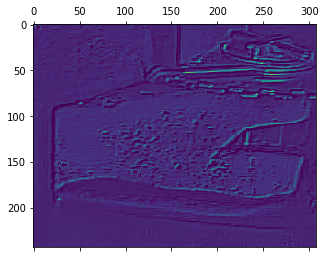

In [0]:
#It's a 243x308 feature map with 32 channels. Let's try visualizing the 3rd channel:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

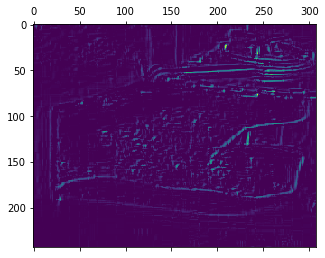

In [0]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

### All Layers Visualisation

In [0]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:5]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size, size_2 = layer_activation.shape[1], layer_activation.shape[2]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row

    display_grid = np.zeros((size * n_cols, images_per_row * size_2))
    
    # (486, 4928) - 243 * 2, 308 * 16
    # print(display_grid.shape)
    
    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            
            display_grid[col * size : (col + 1) * size,
                         row * size_2 : (row + 1) * size_2] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

NameError: ignored

### Show Grarh

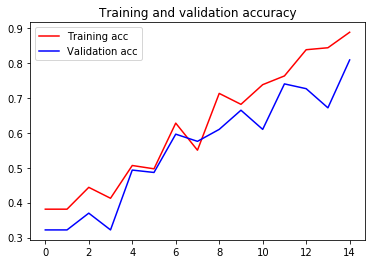

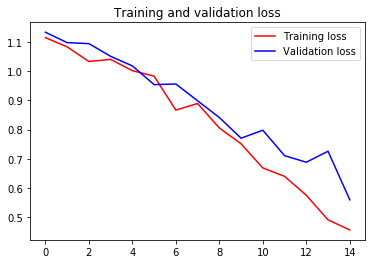

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Prediction Model

In [0]:
import numpy as np
from keras.preprocessing import image

path = '/content/' + 'source2_071.bmp'
img = image.load_img(path, target_size=target_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

model.predict(x)

array([[0.6914872 , 0.1638287 , 0.14468408]], dtype=float32)

In [0]:
a = [0.8014872 , 0.0238287 , 0.04468408, 0.02, ] * 100

### Result
---

Working With ImageDataPreprossing:
* Добавили rotation = 20(в train и val) и сетка стала более устойчева к переобучению и батч сайз для вал batch_size=8 
* Добавили ротацию = 40 это привело к хуже результатам, на валидации

* Train_Batch_Size = 64 and Validation = 16
* Steps_Train = 16 And Valid = 8
* Промежуточный  

### Saving Model

In [0]:
model.save('Comtech_First_Model.h5')